<a href="https://colab.research.google.com/github/JMandal02/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Housing.csv")
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
#print all collum name

df.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

price                 0
area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad              0
guestroom             0
basement              0
hotwaterheating       0
airconditioning       0
parking               0
prefarea              0
furnishingstatus    545
dtype: int64


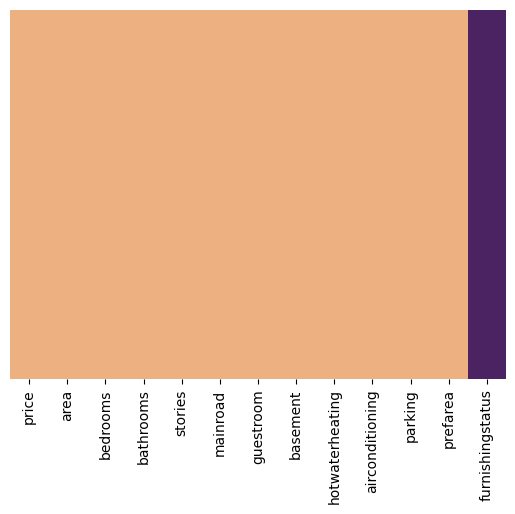

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="flare")
plt.show()


Find **Correlation** between various features in the dataset

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

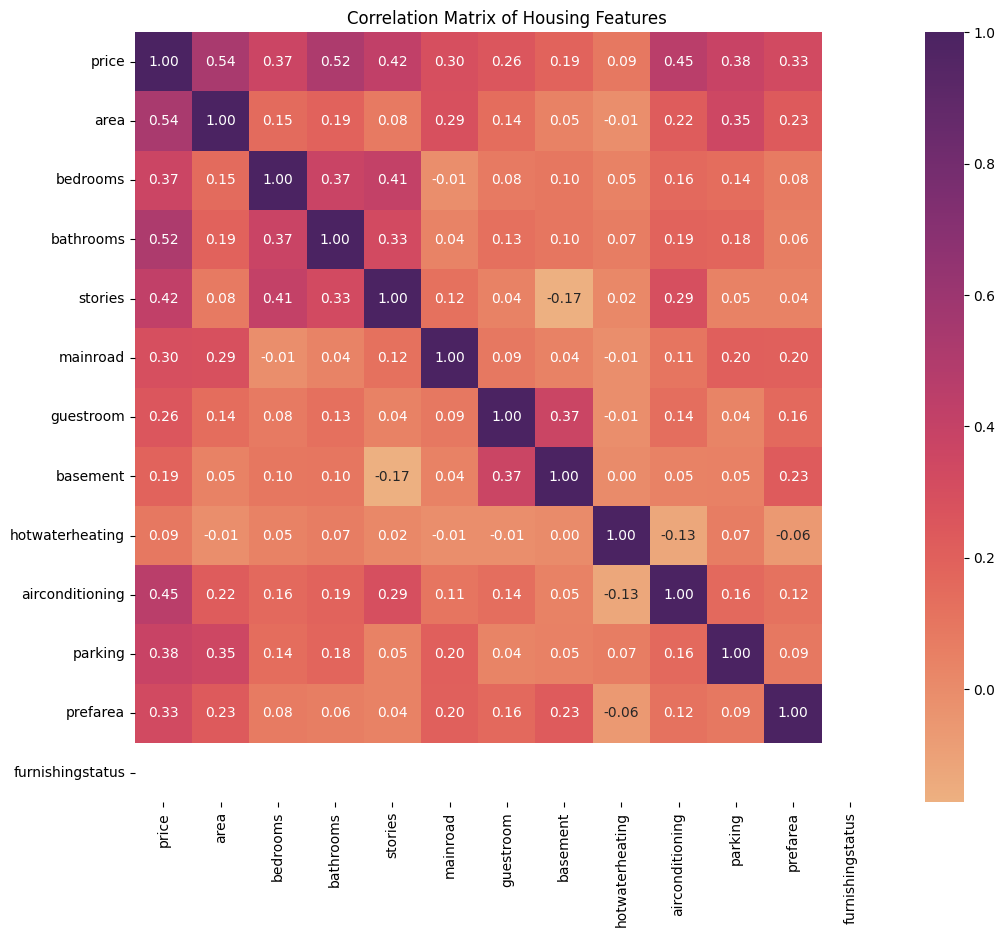

In [ ]:
# Convert 'yes' and 'no' to 1 and 0 in the relevant columns
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].map({'yes': 1, 'no': 0})

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Matrix of Housing Features')
plt.show()


In [ ]:
# 'df' is your DataFrame and 'price' is your target variable

x = df.drop('price', axis=1)  # Features (all columns except 'price')
y = df['price']  # Target variable ('price')

In [ ]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,NaN
1,8960,4,4,4,1,0,0,0,1,3,0,NaN
2,9960,3,2,2,1,0,1,0,0,2,1,NaN
3,7500,4,2,2,1,0,1,0,1,3,1,NaN
4,7420,4,1,2,1,1,1,0,1,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,NaN
541,2400,3,1,1,0,0,0,0,0,0,0,NaN
542,3620,2,1,1,1,0,0,0,0,0,0,NaN
543,2910,3,1,1,0,0,0,0,0,0,0,NaN


In [ ]:
x.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [ ]:
y.head(20)

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
5,10850000
6,10150000
7,10150000
8,9870000
9,9800000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
len(x_train)

381

In [ ]:
len(x_test)

164

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42) # Use reg:squarederror for regression

In [ ]:
# Train the model
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
print(y_pred_xgb)

[ 5241424.5  3348611.   4516988.   3895319.2  6787396.   6250063.
  4051078.8  2497865.8  5318427.   3477074.2  3446318.2  6053895.5
  3977264.   4582098.5  3154162.5  5503140.5  5544022.   3636987.
  2896459.5  4829630.   6227888.   6336281.   6444345.5 10117623.
  3465285.   4161405.8  3937562.5  3392697.8  5094171.5  4350761.5
  3815583.5  5118416.5  5892244.  10389164.   5449489.   5338661.5
  3810653.5  5604735.5  7367116.5  6615196.5  3837927.5  3626963.8
  5202452.5  3110456.2  8742159.   5589816.   5221312.   6345588.
  3228677.   4102249.2  6645166.   4099832.   5718827.5  2294380.8
  5977724.   5331052.5  5484694.   3367335.2  2962787.8  6760368.
  5938562.5  3083157.8  3665207.2  4239543.   3044161.5  5499091.
  5706650.5  4227642.5  4398174.   2535118.2  7556557.5  3828758.8
  3008967.2  7140773.   6662969.   8278562.5  5519505.5  7364371.5
  3911821.5  4617351.   7147626.5  4508810.   5513355.5  3984434.5
  2659267.5  4679604.5  3844719.2  3818175.   3439714.2  3659600.
  

Visualize the **actuale prices** and **predicted prices**

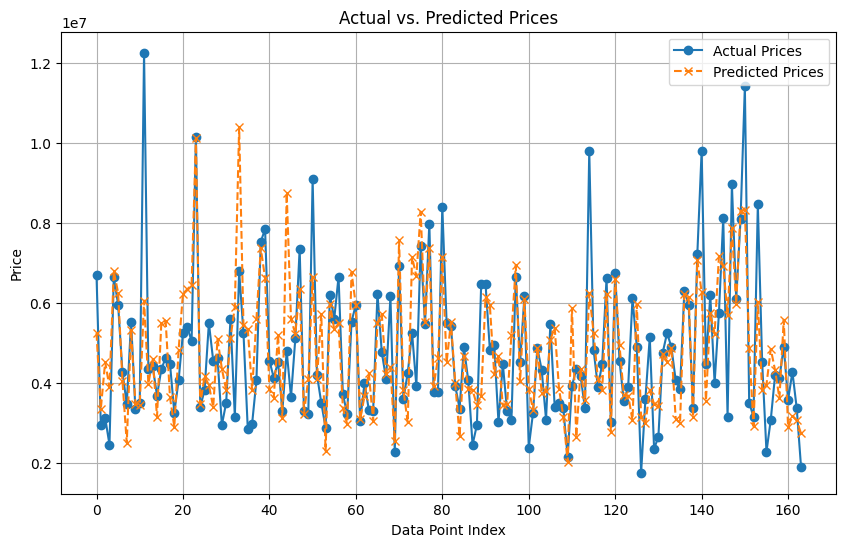

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual prices and y_pred_xgb contains the predicted prices

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', marker='o', linestyle='-') # use .values to get numpy array
plt.plot(y_pred_xgb, label='Predicted Prices', marker='x', linestyle='--')
plt.xlabel('Data Point Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred_xgb)
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1659876409344.0
R-squared (R2): 0.5128760933876038


In [ ]:

# Get user input
area = float(input("Enter area: "))
bedrooms = int(input("Enter number of bedrooms: "))
bathrooms = int(input("Enter number of bathrooms: "))
stories = int(input("Enter number of stories: "))
mainroad = int(input("Mainroad (1 for yes, 0 for no): "))
guestroom = int(input("Guestroom (1 for yes, 0 for no): "))
basement = int(input("Basement (1 for yes, 0 for no): "))
hotwaterheating = int(input("Hot water heating (1 for yes, 0 for no): "))
airconditioning = int(input("Air conditioning (1 for yes, 0 for no): "))
parking = int(input("Enter parking spaces: "))
prefarea = int(input("Prefarea (1 for yes, 0 for no): "))
furnishingstatus = int(input("Furnishing status (0 for unfurnished, 1 for semi-furnished, 2 for furnished): "))


# Create a DataFrame from user input
user_input = pd.DataFrame({
    'area': [area],
    'bedrooms': [bedrooms],
    'bathrooms': [bathrooms],
    'stories': [stories],
    'mainroad': [mainroad],
    'guestroom': [guestroom],
    'basement': [basement],
    'hotwaterheating': [hotwaterheating],
    'airconditioning': [airconditioning],
    'parking': [parking],
    'prefarea': [prefarea],
    'furnishingstatus': [furnishingstatus]
})

# Make prediction
predicted_price = xgb_model.predict(user_input)
print("Predicted price:", predicted_price[0])


Enter area: 7420
Enter number of bedrooms: 4
Enter number of bathrooms: 2
Enter number of stories: 3
Mainroad (1 for yes, 0 for no): 1
Guestroom (1 for yes, 0 for no): 0
Basement (1 for yes, 0 for no): 0
Hot water heating (1 for yes, 0 for no): 0
Air conditioning (1 for yes, 0 for no): 1
Enter parking spaces: 2
Prefarea (1 for yes, 0 for no): 1
Furnishing status (0 for unfurnished, 1 for semi-furnished, 2 for furnished): 2
Predicted price: 13247919.0
